In [5]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Load the CSV data
load_gen_data = pd.read_csv(r'sample data\rye_generation_and_load.csv')

# Load the HDF5 data
with h5py.File(r'met_data.h5\met_data.h5', 'r') as hdf:
    # List all groups
    print("Keys in HDF5 file:", list(hdf.keys()))
    # Assuming 'lat63_41_lon10_11' contains a structured array or similar dataset
    met_data = np.array(hdf['lat63_41_lon10_11'])

# Assuming the dataset contains structured data with named columns
met_df = pd.DataFrame(met_data)

# Explore the structure of the load and generation data
print("Load and Generation Data Info:")
print(load_gen_data.info())
print("First 5 rows of Load and Generation Data:")
print(load_gen_data.head())

# Summary statistics for load and generation data
print("Summary Statistics for Load and Generation Data:")
print(load_gen_data.describe())

# Explore the structure of the weather data
print("Weather Data Info:")
print(met_df.info())
print("First 5 rows of Weather Data:")
print(met_df.head())

# Summary statistics for weather data
print("Summary Statistics for Weather Data:")
print(met_df.describe())

# Check for missing values in both datasets
print("Missing values in Load and Generation Data:")
print(load_gen_data.isnull().sum())
print("Missing values in Weather Data:")
print(met_df.isnull().sum())

# Handle missing values if necessary, example using forward fill
load_gen_data.fillna(method='ffill', inplace=True)
met_df.fillna(method='ffill', inplace=True)

# Distinguish column types for tailored analysis
numeric_cols_load_gen = load_gen_data.select_dtypes(include=[np.number])
print("Numeric columns in Load and Generation Data:")
print(numeric_cols_load_gen.columns)

numeric_cols_met = met_df.select_dtypes(include=[np.number])
print("Numeric columns in Weather Data:")
print(numeric_cols_met.columns)


Keys in HDF5 file: ['lat63_41_lon10_11']
Load and Generation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        8280 non-null   object 
 1   Consumption  8280 non-null   float64
 2   Solar        8280 non-null   float64
 3   Wind         8266 non-null   float64
dtypes: float64(3), object(1)
memory usage: 258.9+ KB
None
First 5 rows of Load and Generation Data:
                   index  Consumption  Solar    Wind
0  2020-01-01T13:00:00.0    26.514689    0.0   40.59
1  2020-01-01T14:00:00.0    28.326960    0.0   67.86
2  2020-01-01T15:00:00.0    23.682207    0.0  116.68
3  2020-01-01T16:00:00.0    25.354782    0.0  120.22
4  2020-01-01T17:00:00.0    23.861942    0.0  109.86
Summary Statistics for Load and Generation Data:
       Consumption        Solar         Wind
count  8280.000000  8280.000000  8266.000000
mean     19.

C:\Users\yash Dhangar\AppData\Local\Temp\ipykernel_6488\1674992060.py:46: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  load_gen_data.fillna(method='ffill', inplace=True)
C:\Users\yash Dhangar\AppData\Local\Temp\ipykernel_6488\1674992060.py:47: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  met_df.fillna(method='ffill', inplace=True)


C:\Users\yash Dhangar\AppData\Local\Temp\ipykernel_6488\3447544639.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = load_gen_data.resample('M').mean()


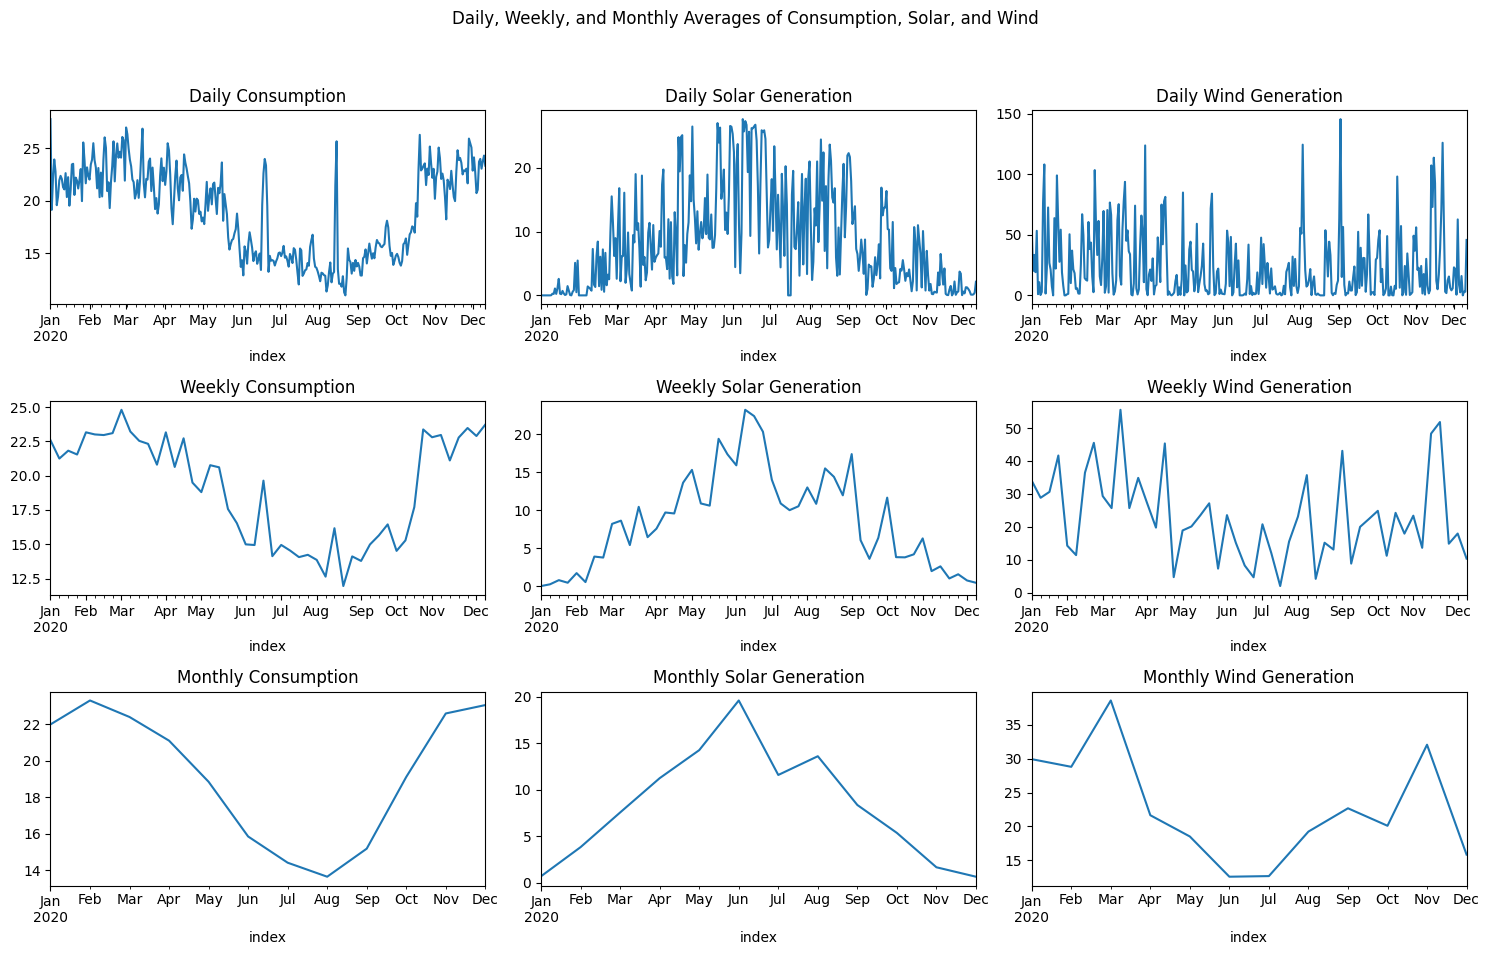

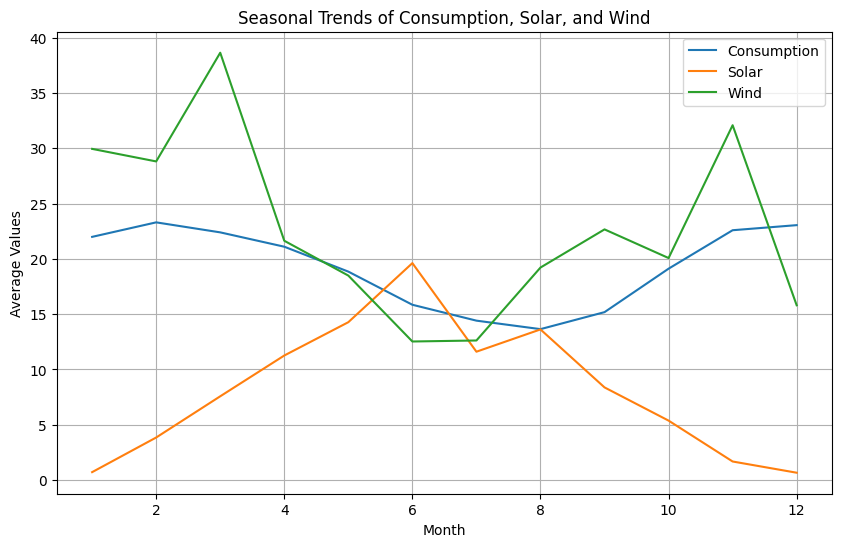

In [6]:
# Convert the 'index' column to datetime format for better time series analysis
load_gen_data['index'] = pd.to_datetime(load_gen_data['index'])

# Set the datetime column as the index of the dataframe
load_gen_data.set_index('index', inplace=True)

# Resampling data to daily, weekly, and monthly frequencies to observe different patterns
daily_data = load_gen_data.resample('D').mean()
weekly_data = load_gen_data.resample('W').mean()
monthly_data = load_gen_data.resample('M').mean()

# Plotting daily, weekly, and monthly averages of Consumption, Solar, and Wind
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Daily, Weekly, and Monthly Averages of Consumption, Solar, and Wind')

# Daily plots
daily_data['Consumption'].plot(ax=axes[0, 0], title='Daily Consumption')
daily_data['Solar'].plot(ax=axes[0, 1], title='Daily Solar Generation')
daily_data['Wind'].plot(ax=axes[0, 2], title='Daily Wind Generation')

# Weekly plots
weekly_data['Consumption'].plot(ax=axes[1, 0], title='Weekly Consumption')
weekly_data['Solar'].plot(ax=axes[1, 1], title='Weekly Solar Generation')
weekly_data['Wind'].plot(ax=axes[1, 2], title='Weekly Wind Generation')

# Monthly plots
monthly_data['Consumption'].plot(ax=axes[2, 0], title='Monthly Consumption')
monthly_data['Solar'].plot(ax=axes[2, 1], title='Monthly Solar Generation')
monthly_data['Wind'].plot(ax=axes[2, 2], title='Monthly Wind Generation')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Analyzing seasonal trends using groupby with the month to see average behavior per month
seasonal_trends = load_gen_data.groupby(load_gen_data.index.month).mean()

# Plotting seasonal trends
fig, ax = plt.subplots(figsize=(10, 6))
seasonal_trends[['Consumption', 'Solar', 'Wind']].plot(ax=ax)
ax.set_title('Seasonal Trends of Consumption, Solar, and Wind')
ax.set_xlabel('Month')
ax.set_ylabel('Average Values')
ax.legend(['Consumption', 'Solar', 'Wind'])
plt.grid(True)
plt.show()


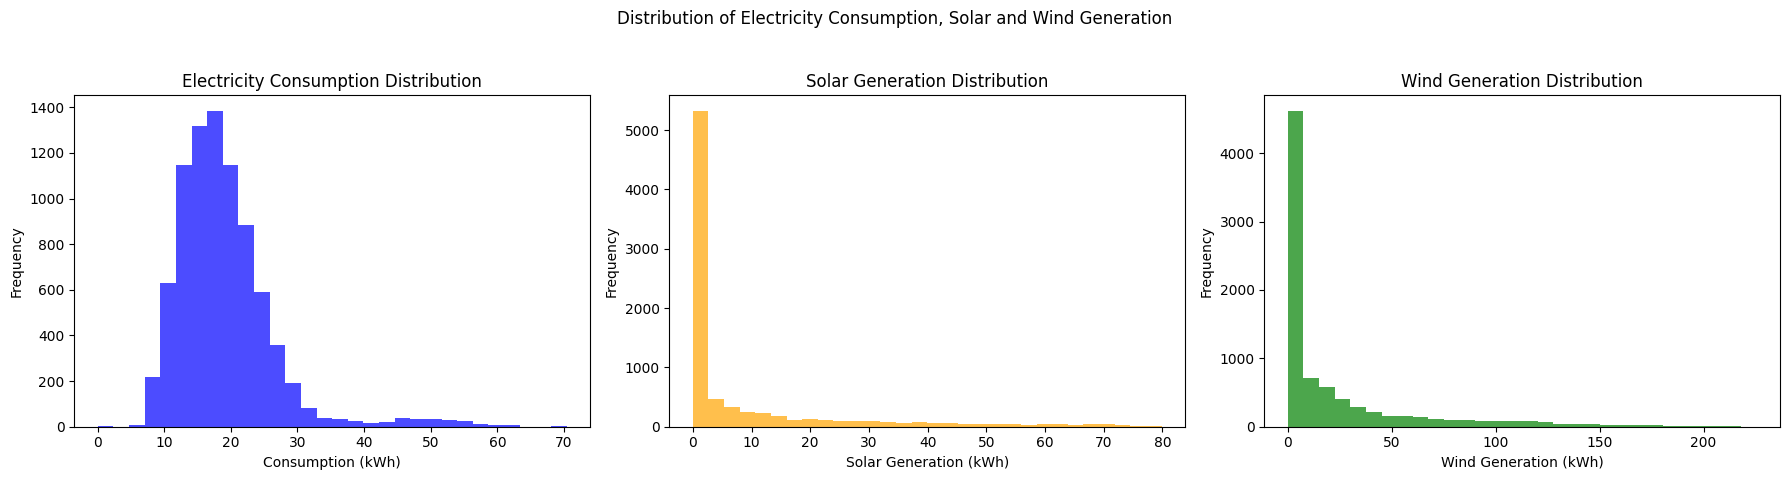

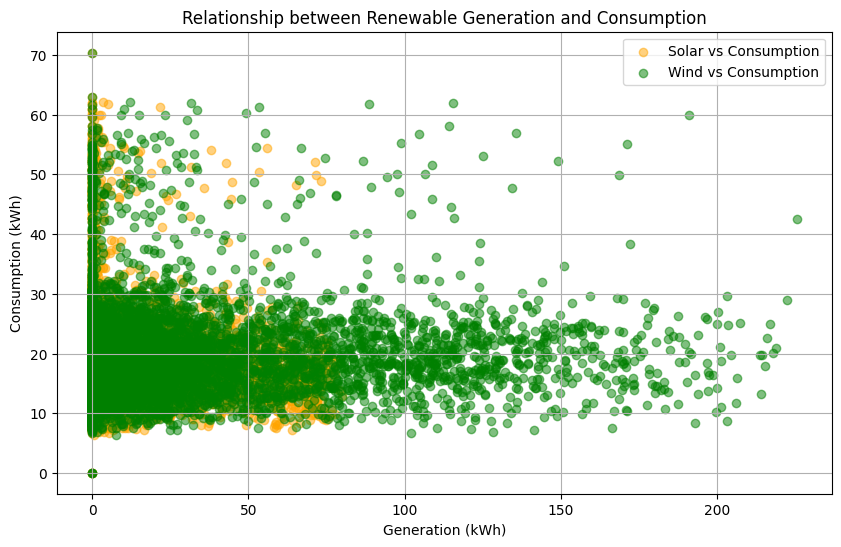

Correlation matrix between Consumption, Solar, and Wind:
             Consumption     Solar      Wind
Consumption     1.000000 -0.116413  0.074225
Solar          -0.116413  1.000000 -0.021200
Wind            0.074225 -0.021200  1.000000


In [7]:
# Analyzing the distribution of electricity consumption, solar and wind generation
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle('Distribution of Electricity Consumption, Solar and Wind Generation')

# Histogram for Electricity Consumption
load_gen_data['Consumption'].plot(kind='hist', bins=30, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Electricity Consumption Distribution')
axes[0].set_xlabel('Consumption (kWh)')
axes[0].set_ylabel('Frequency')

# Histogram for Solar Generation
load_gen_data['Solar'].plot(kind='hist', bins=30, ax=axes[1], color='orange', alpha=0.7)
axes[1].set_title('Solar Generation Distribution')
axes[1].set_xlabel('Solar Generation (kWh)')

# Histogram for Wind Generation
load_gen_data['Wind'].plot(kind='hist', bins=30, ax=axes[2], color='green', alpha=0.7)
axes[2].set_title('Wind Generation Distribution')
axes[2].set_xlabel('Wind Generation (kWh)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Exploring the relationship between consumption and renewable energy generation
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(load_gen_data['Solar'], load_gen_data['Consumption'], color='orange', alpha=0.5, label='Solar vs Consumption')
plt.scatter(load_gen_data['Wind'], load_gen_data['Consumption'], color='green', alpha=0.5, label='Wind vs Consumption')
ax.set_xlabel('Generation (kWh)')
ax.set_ylabel('Consumption (kWh)')
ax.set_title('Relationship between Renewable Generation and Consumption')
ax.legend()
plt.grid(True)
plt.show()

# Correlation analysis
correlation_matrix = load_gen_data[['Consumption', 'Solar', 'Wind']].corr()
print("Correlation matrix between Consumption, Solar, and Wind:")
print(correlation_matrix)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
X = load_gen_data[['Solar', 'Wind']]  # Features: Solar and Wind generation
y = load_gen_data['Consumption']      # Target: Consumption

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Feature importance
feature_importances = rf_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(['Solar', 'Wind'], feature_importances):
    print(f"{feature}: {importance:.2f}")


Mean Squared Error: 68.66
R^2 Score: -0.33
Feature Importances:
Solar: 0.47
Wind: 0.53


In [ ]:
# Evaluate the performance of the RandomForestRegressor model
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(['Solar', 'Wind'], feature_importances):
    print(f"{feature}: {importance:.2f}")


In [ ]:
# Optimization Strategies for Energy Management and Grid Stability

# 1. Demand Response Programs
# Implementing demand response programs can help shift energy consumption to times when renewable energy production is high or overall demand is low.

# Calculate the average hourly consumption and generation
hourly_avg = load_gen_data.resample('H').mean()

# Identify hours when solar and wind generation exceed consumption
excess_generation_hours = hourly_avg[(hourly_avg['Solar'] + hourly_avg['Wind']) > hourly_avg['Consumption']]

# Visualize the excess generation hours
plt.figure(figsize=(12, 6))
plt.plot(excess_generation_hours.index, excess_generation_hours['Solar'] + excess_generation_hours['Wind'], label='Total Generation (Solar + Wind)')
plt.plot(excess_generation_hours.index, excess_generation_hours['Consumption'], label='Consumption')
plt.title('Excess Renewable Generation Hours')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Energy Storage Solutions
# Analyzing the potential for energy storage to balance supply and demand by storing excess energy and using it during low generation periods.

# Calculate the net generation (generation - consumption)
hourly_avg['Net Generation'] = hourly_avg['Solar'] + hourly_avg['Wind'] - hourly_avg['Consumption']

# Identify hours with negative net generation (deficit) and positive net generation (surplus)
deficit_hours = hourly_avg[hourly_avg['Net Generation'] < 0]
surplus_hours = hourly_avg[hourly_avg['Net Generation'] > 0]

# Visualize the net generation
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg['Net Generation'], label='Net Generation')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Net Generation Over Time')
plt.xlabel('Time')
plt.ylabel('Net Generation (kWh)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Smart Grid Technologies
# Implementing smart grid technologies can improve grid efficiency and enable real-time monitoring and control of energy flows.

# Example: Implementing a simple smart grid control algorithm
# If net generation is positive, store energy; if negative, use stored energy if available

# Initialize energy storage state
storage_capacity = 1000  # kWh
stored_energy = 0
energy_flow = [] 

# Simulate the smart grid control
for index, row in hourly_avg.iterrows():
    if row['Net Generation'] > 0:
        # Store energy if there's surplus and capacity
        energy_to_store = min(storage_capacity - stored_energy, row['Net Generation'])
        stored_energy += energy_to_store
        energy_flow.append(energy_to_store)
    else:
        # Use stored energy if there's a deficit
        energy_to_use = min(stored_energy, -row['Net Generation'])
        stored_energy -= energy_to_use
        energy_flow.append(-energy_to_use)

# Visualize the energy flow and storage state over time
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, energy_flow, label='Energy Flow into/from Storage')
plt.plot(hourly_avg.index, [stored_energy] * len(hourly_avg.index), label='Stored Energy', linestyle='--')
plt.title('Smart Grid Energy Storage Management')
plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.grid(True)
plt.show()
